# Plotting in Python using Matplotlib

An introduction to plotting data in Python using Matplotlib.

First, an important setting to have the plots appear inline in this <strike>IPython</strike> Jupyter notebook.<br>
Second, import matplotlib.pyplot and numpy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's plot a simple function over integers from 0 to 100, well actually, from 0 to 99.  Is there a particularly pretty function we can plot?  Something that doesn't just blow up or down, but waves around nicely.  Google reveals several pretty plots, e.g. the heart, but many of those are parametric curves, contours, or multiple functions (e.g. the heart).  The [Glasser function](http://mathworld.wolfram.com/GlasserFunction.html) is an interesting one, but too complex to compute, as it's defined as an integral of $sin(t sin t)$.  The ["saw-like" functions](http://math.feld.cvut.cz/mt/txtb/4/txe3ba4r.htm) are interesting, but they are over reals, mostly between -1 to 1.

So let's plot a simple polynomial.  After some fiddling of the coefficients, we get a pleasing curve.

Why did we use `np.arange` instead of Python's built-in `range`? That's because NumPy array supports concise operations such as `x**2`, which aren't supported by Python list.

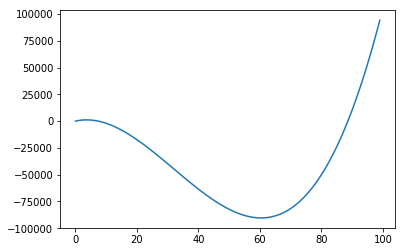

In [2]:
x = np.arange(0, 100)
y = x**3 - 96 * x**2 + 654 * x
plt.plot(y)

## Histogram example

http://matplotlib.org/users/pyplot_tutorial.html

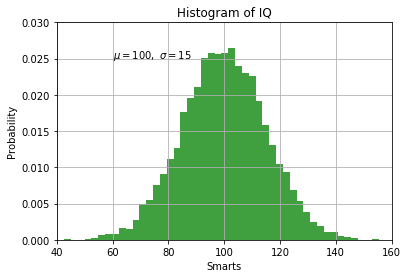

In [3]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# the function returns n, bins, patches, but we don't need them
plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

# IPython notebook displays the plot even without the 'show' command.
# plt.show()

## Multi-dimensional y

If your x is 1D array of size N, and y is 2D array of size N x M, you will get M plots.  Let's try to plot sine and cosine between $[-pi, +pi]$.  First, create the data arrays.

In [4]:
import math
t = np.linspace(-math.pi, math.pi, 1000)
sine = np.sin(t)
cosine = np.cos(t)
print "     t.shape = {0}".format(t.shape)
print "  sine.shape = {0}     cosine.shape = {1}".format(sine.shape, cosine.shape)
print "sine.T.shape = {0}   cosine.T.shape = {1}".format(sine.T.shape, cosine.T.shape)

     t.shape = (1000,)
  sine.shape = (1000,)     cosine.shape = (1000,)
sine.T.shape = (1000,)   cosine.T.shape = (1000,)


Let's combine sine and cosine into a 2D array.  Options are `vstack` or `hstack`.  Remember that the transpose of 1D array is itself.  So `hstack` of sine, cosine or their transposes makes a 1D array of size 2000.  `vstack` makes a 2D array of (2, 1000).  It needs to be transposed before plotting.

In [5]:
hstacked = np.hstack((sine, cosine))
hstackedt = np.hstack((sine.T, cosine.T))
vstacked = np.vstack((sine, cosine))
print "hstack((sine  , cosine  )).shape   =", hstacked.shape
print "hstack((sine.T, cosine.T)).shape   =", hstackedt.shape
print "vstack((sine  , cosine  )).shape   =", vstacked.shape
print "vstack((sine  , cosine  )).T.shape =", vstacked.T.shape
sinecosine = vstacked.T

hstack((sine  , cosine  )).shape   = (2000,)
hstack((sine.T, cosine.T)).shape   = (2000,)
vstack((sine  , cosine  )).shape   = (2, 1000)
vstack((sine  , cosine  )).T.shape = (1000, 2)


With the right (1000, 2)-shaped sinecosine array, we can make two lines in one plot.

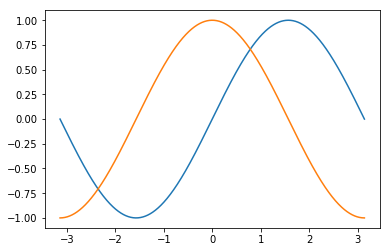

In [6]:
plt.plot(t, sinecosine)

## Customizing the look

You need not mess with multi-dimensional arrays when creating multiple plots.  You can just do multiple `plot` commands, or provide multiple x, y pairs to a single `plot` command.

That's what we do below.  We also follow along the [Matplotlib Tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/) by Nicolas P. Rougier and customize the look:

- Change the size from default 6 x 4 to 8 x 4 inches
- Set sensible limits and ticks for the axes

We then save a reference to the figure, so that we can customize it further.  [One way](http://stackoverflow.com/questions/10895195/manipulate-inline-figure-in-ipython-notebook) of doing that is to run `%config InlineBackend.close_figures = False` to disable IPython Notebook's default mode of closing figures, and then use `gcf()` in the subsequent cells, but it works just fine if we explicitly save a reference to the figure, and use it later.

Default Figure Size: [6.0, 4.0]


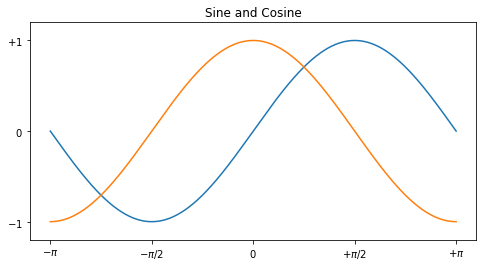

In [7]:
print "Default Figure Size:", plt.rcParams.get('figure.figsize')
plt.figure(figsize=(8, 4))
plt.plot(t, sine, t, cosine)

plt.title("Sine and Cosine")

xmin, xmax = t.min(), t.max()
ymin, ymax = sine.min(), sine.max()

dx = (xmax - xmin) * 0.05
dy = (ymax - ymin) * 0.1

plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], # np.linspace(-np.pi, np.pi, 5)
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1],
           [r'$-1$', r'$0$', r'$+1$'])

sincosfig = plt.gcf()

Next we want the x, y axes lines to pass through the origin (0, 0).  The lines are called 'spines'.  We do the following:

  * Move bottom spine to y = 0
  * Move the left spine to x =0
  * Make the top and right spines invisible

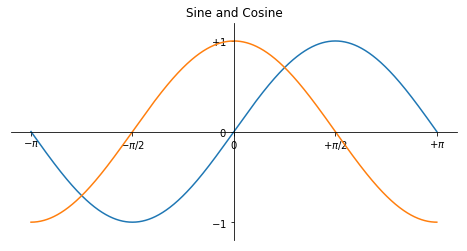

In [8]:
axes = sincosfig.get_axes()[0]
axes.spines['top'].set_color('none')
axes.spines['right'].set_color('none')
axes.spines['bottom'].set_position(('data', 0))
axes.spines['left'].set_position(('data', 0))
axes.xaxis.set_ticks_position('bottom')
axes.yaxis.set_ticks_position('left')
sincosfig

  * Add legend for the plots

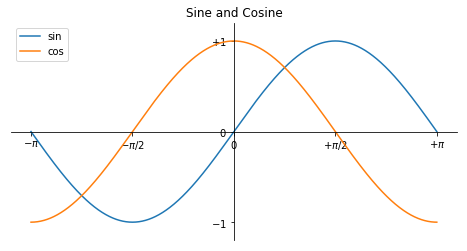

In [9]:
axes = sincosfig.get_axes()[0]
axes.legend(['sin', 'cos'], loc='upper left')
sincosfig

Another way to set legend is to set labels on each of the lines in the axes.  Let's try that:

  * Get axes
  * Set label for line 0 in the axes
  * Set label for line 1 in the axes
  * Turn on axes legend

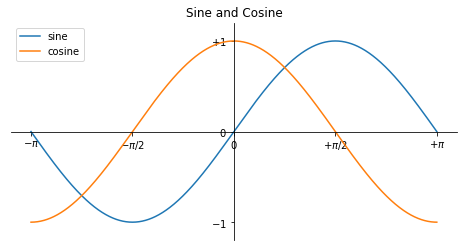

In [10]:
axes = sincosfig.get_axes()[0]
axes.lines[0].set_label('sine')
axes.lines[1].set_label('cosine')
axes.legend(loc='upper left')
sincosfig

Let's annotate a few points.  Matplotlib allows using LaTeX math syntax for any text.

  * Write a little helper function `annot` to add annotation at point (x, y).
  * Add annotation at $(2\pi/3, \sqrt{3}/2)$ for the sine curve.
  * Add annotation at $(2\pi/3, -1/2)$ for the cosine curve.

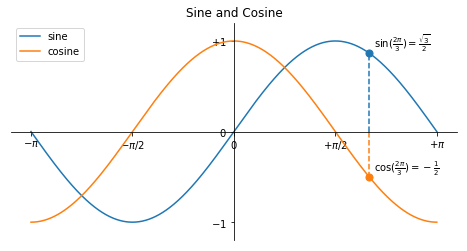

In [11]:
axes = sincosfig.get_axes()[0]

def annot(axes, x, y, text, color):
    axes.plot([x, x], [0, y], linestyle='--', color=color)
    axes.scatter([x], [y], 50, color=color)
    axes.annotate(text, xy=(x,y),
                  xytext=(5, 5), textcoords='offset points')

p = 2 * np.pi / 3
sintext = r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$'
costext = r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$'
annot(axes, p, np.sin(p), sintext, axes.lines[0].get_color())
annot(axes, p, np.cos(p), costext, axes.lines[1].get_color())
sincosfig

## Subplots, sharing axes, and hspace=0

http://matplotlib.org/examples/pylab_examples/subplots_demo.html

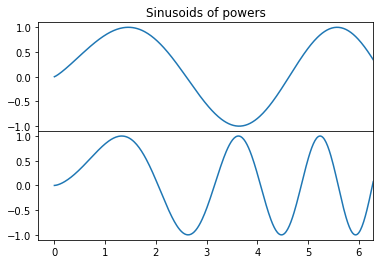

In [12]:
x = np.linspace(0, 2 * np.pi, 400)
yy = [ np.sin(x ** 1.2), np.sin(x ** 1.6) ]

fig, axes = plt.subplots(2, sharex=True, sharey=True)
for ax, y in zip(axes, yy):
    ax.plot(x, y)

#plt.title("Sinusoids of powers")
axes[0].set_title("Sinusoids of powers")

plt.xlim(xmax=2*np.pi)

plt.subplots_adjust(hspace=0)

## Understanding Types: Figures, Axes, Lines

What does a simple `plt.plot` return when you pass one x array and one y array?

It returns **list of matplotlib.lines.Line2D**.  In this case, its size is 1.

(list, matplotlib.lines.Line2D, 1)

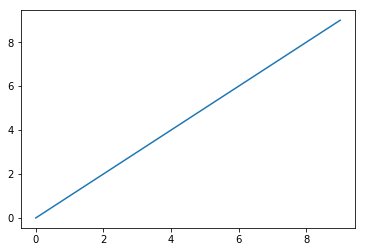

In [13]:
retval = plt.plot(range(10), range(10))
type(retval), type(retval[0]), len(retval)

Matplotlib has the function **`plt.gcf()`**, which returns you the current figure.

It is of type **matplotlib.figure.Figure**.

In [14]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Let's create a new figure of our own.  It is done using **`plt.figure()`**.

In [15]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

So by now we know that having just `fig` as the last line of a cell makes the figure appear in the output. Let's try that with our newly created figure. 

In [16]:
fig

<Figure size 432x288 with 0 Axes>

No figure appears, because there isn't any content in the figure.  Technically speaking, there aren't any **axes** in the figure.  That's evident by calling **`fig.get_axes()`**.

In [17]:
fig.get_axes()

[]

Calling **`fig.gca()`** gets your the current axes, and it creates one if there are none.  Once a figure contains axes, you can display it.  It will just show as default rectangle of axes, with default limits.

In [18]:
fig.gca()   # Get the current axes, creating one if necessary

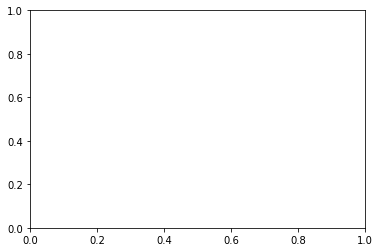

In [19]:
fig

In [20]:
axes = fig.gca()  # Get the current axes, creating one if necessary
type(axes)

matplotlib.axes._subplots.AxesSubplot

When you plot things, you are actually plotting them on the axes.  So given an axes object, you can invoke **`plot`, `bar`, `barh`, `hist`** etc. on it to make plots. 

In [21]:
axes.bar(range(4), [30, 48, 57, 35])

<BarContainer object of 4 artists>

In [22]:
axes.get_lines()

<a list of 0 Line2D objects>

In [23]:
axes.lines

[]

In [24]:
axes.artists

[]

In [25]:
axes.containers

[<BarContainer object of 4 artists>]

So you see the newly created bar plot is contained in **`axes.containers`**.  Let's display the bar plot by invoking the variable `fig` as the last line of the next cell.

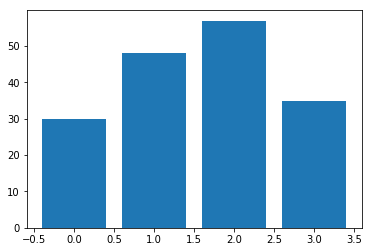

In [26]:
fig